<a href="https://colab.research.google.com/github/robitussin/CCDATSCL_EXERCISES/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

In this activity, you will work with the New York City Airbnb Open Data—a popular, messy, and highly realistic dataset used by data analysts and data scientists around the world. The dataset includes thousands of Airbnb listings along with details about hosts, locations, prices, reviews, and more.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8Pmq3Gv7y7z_2Xun-OqMIk43kd5u0TXEatw&s"/>


To guide your work, you will follow the 6-Step Data Wrangling Process, a professional workflow used in industry:

- Discovering. Become familiar with the data by exploring its structure and observing patterns.

- Structuring. Fix issues related to format, column types, indices, and duplicated records.

- Cleaning. Handle missing values, outliers, and inconsistencies so the dataset becomes trustworthy.

- Enriching. Add new features, aggregate information, and enhance the dataset for deeper insights.

- Validating. Apply rule-based checks to ensure the data meets quality standards.

- Publishing. Export and prepare the cleaned dataset for downstream analysis or reporting.
Throughout this exercise, you will answer questions and fill in code cells based on these six steps. You will mimic what professional data scientists do when preparing data for business intelligence dashboards, machine learning models, or exploratory analysis.

In [428]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'new-york-city-airbnb-open-data' dataset.
Path to dataset files: /kaggle/input/new-york-city-airbnb-open-data
True


## A. Discovering


Display the first 10 rows

In [429]:
# put your answer here
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


Display the column names:

In [430]:
# put your answer here
df.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Display the dataframe shape:

In [431]:
# put your answer here
df.shape

(48895, 16)

Identify the numerical features:

In [432]:
# put your answer here
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
newdf.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Identify the categorical features

In [433]:
# put your answer here

newdf = df.select_dtypes(include=["object"])
newdf.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

What are the top 5 questions this dataset might help answer?

In [434]:
# put your answer here
# how expensive are bnb prices
# how many reviews do the locatins receive
# what kind of room types are the most expensive
# how many locations are available in a whole year
# what area do most of expensive bnbs are located


## B. Structuring

Check if the dataset has proper column types

In [435]:
# put your answer here
display(df.dtypes)

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


Check if the dataset has index issues

In [436]:
# put your answer here
df.index

RangeIndex(start=0, stop=48895, step=1)

Check if the dataset has duplicated rows

In [437]:
# put your answer here
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
48890,False
48891,False
48892,False
48893,False


Convert columns to correct types (e.g., dates → datetime).

In [438]:
df["last_review"]

,last_review
0,2018-10-19
1,2019-05-21
2,NaN
3,2019-07-05
4,2018-11-19
...,...
48890,NaN
48891,NaN
48892,NaN
48893,NaN


In [439]:
# put your answer here
df["last_review"] = pd.to_datetime(df["last_review"])
df["last_review"].dtype

dtype('<M8[ns]')

In [440]:
df["last_review"]

,last_review
0,2018-10-19
1,2019-05-21
2,NaT
3,2019-07-05
4,2018-11-19
...,...
48890,NaT
48891,NaT
48892,NaT
48893,NaT


Identify at least one structural issue and describe how to fix it.

In [441]:
# put your answer here
# the last_review column contains NaN rows, so when converting to datetime, their values is changed to NaT instead of an actual date

## C. Cleaning



Check for missing values

In [442]:
# put your answer here
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Check for outliers in `minimum_nights`

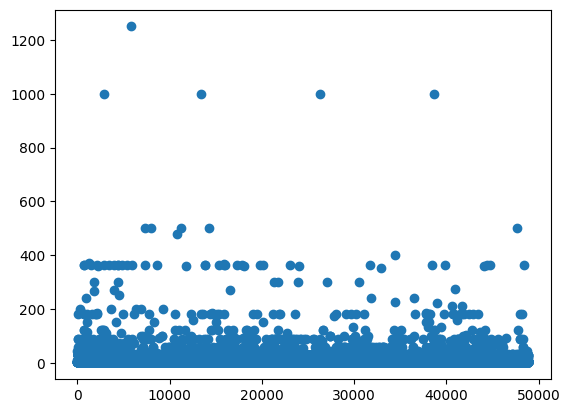

In [443]:
# put your answer here
plt.plot(df['minimum_nights'], "o")
plt.show()

Check for invalid values (e.g., price ≤ 0)

In [444]:
print(df.select_dtypes(include=numerics).columns)


Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


In [445]:
df[df["price"] <= 0]["price"]

,price
23161,0
25433,0
25634,0
25753,0
25778,0
25794,0
25795,0
25796,0
26259,0
26841,0


In [446]:
# put your answer here
for x in df.select_dtypes(include=numerics).columns:
  if (x == "latitude" or x == "longitude"):
    continue
  else:
    d = df[df[x] <= 0][x]
    # print(d)
    if (not d.empty):
        print(x)


price
number_of_reviews
availability_365


Apply a missing-value strategy (drop, fill, or flag)


In [447]:
df = df.dropna(axis=0)

for x in df.select_dtypes(include=numerics).columns:
  if (x == "latitude" or x == "longitude"):
    continue
  else:
    df = df[df[x] > 0]

Apply an outlier-handling strategy

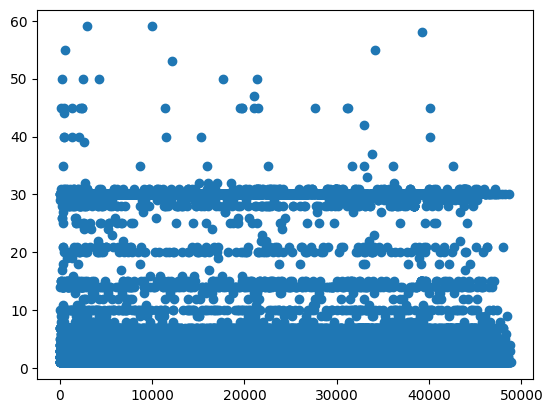

In [448]:
df = df[df["minimum_nights"] < 60]
plt.plot(df['minimum_nights'], "o")
plt.show()

In [449]:
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


## D. Enriching

Create at least 3 new variables:
- price_per_minimum_night
- review_rate_per_month (combine ratings + frequency)
- is_expensive (boolean flag based on price threshold)


In [450]:
df["price_per_minimum_night"] = df["price"] / df["minimum_nights"]
df["is_expensive"] = df["price"] > 400
df["review_rate_per_month"] = df["number_of_reviews"] * df["reviews_per_month"]




In [451]:
# put your answer here
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_minimum_night,is_expensive,review_rate_per_month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149.000000,False,1.89
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225.000000,False,17.10
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89.000000,False,1252.80
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,66.666667,False,43.66
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,39.500000,False,1492.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147,129.000000,False,1.00
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339,45.000000,False,1.00
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87,235.000000,False,1.00
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40,100.000000,False,4.00


Create 1 aggregated summary table

(e.g. average price per neighborhood, number of hosts per borough)

In [452]:
loc = df.groupby("neighbourhood")["price_per_minimum_night"].sum()
loc

,price_per_minimum_night
neighbourhood,
Allerton,1856.892857
Arden Heights,91.766667
Arrochar,1243.500000
Arverne,6827.500000
Astoria,25237.935038
...,...
Willowbrook,62.250000
Windsor Terrace,4370.314368
Woodhaven,1905.242857


## E. Validating

Create at least 3 validation checks
- Price must be positive.
- Host ID should not be null.
- Minimum nights must be ≥ 1.
- Generate a validation report:
- Count of rows violating each rule.

Decide if invalid rows (if any) should be removed or corrected?

In [453]:
# put your answer here
print("VALIDATION REPORT")
a = df[df["price"] < 0].empty
b = df[df["host_id"].isnull()].empty
c = df[df["minimum_nights"] < 1].empty
if (a):
  print("price is positive")
if (b):
  print("host_id is not null")
if (c):
  print("minimum_nights is not less than 1")

if (a and b and c):
  print("\nNo rows were violated")


VALIDATION REPORT
price is positive
host_id is not null
minimum_nights is not less than 1

No rows were violated


## F. Publishing



```
# This is formatted as code
```

Select final columns for publication.



In [454]:
# put your answer here
df = df[["price", "minimum_nights","longitude", "latitude", "price_per_minimum_night", "neighbourhood", "neighbourhood_group", "room_type"  ]]

In [457]:
df

,price,minimum_nights,longitude,latitude,price_per_minimum_night,neighbourhood,neighbourhood_group,room_type
0,149,1,-73.97237,40.64749,149.000000,Kensington,Brooklyn,Private room
1,225,1,-73.98377,40.75362,225.000000,Midtown,Manhattan,Entire home/apt
3,89,1,-73.95976,40.68514,89.000000,Clinton Hill,Brooklyn,Entire home/apt
5,200,3,-73.97500,40.74767,66.666667,Murray Hill,Manhattan,Entire home/apt
7,79,2,-73.98493,40.76489,39.500000,Hell's Kitchen,Manhattan,Private room
...,...,...,...,...,...,...,...,...
48782,129,1,-73.95366,40.78099,129.000000,Upper East Side,Manhattan,Private room
48790,45,1,-73.81459,40.75104,45.000000,Flushing,Queens,Private room
48799,235,1,-74.14275,40.54179,235.000000,Great Kills,Staten Island,Private room
48805,100,1,-73.92400,40.80787,100.000000,Mott Haven,Bronx,Entire home/apt


Export cleaned dataset as "cleaned_airbnb.csv"

In [455]:
# put your answer here
df.to_csv("cleaned_airbnb.csv")

Export summary reports (e.g., validation or aggregations) as CSV.

In [456]:
# put your answer here
loc.to_csv("summary_report.csv")